In [1]:
from tensorflow.keras import datasets

mnist = datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3

In [3]:
import time

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))
print('fit time: ', time.time() - start_time)

Epoch 1/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.2366 - accuracy: 0.9262 - val_loss: 0.0326 - val_accuracy: 0.9889
Epoch 2/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0427 - accuracy: 0.9857 - val_loss: 0.0285 - val_accuracy: 0.9911
Epoch 3/5
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.0291 - val_accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0257 - val_accuracy: 0.9915
Epoch 5/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0184 - accuracy: 0.9936 - val_loss: 0.0322 - val_accuracy: 0.9917
fit time:  472.30450987815857


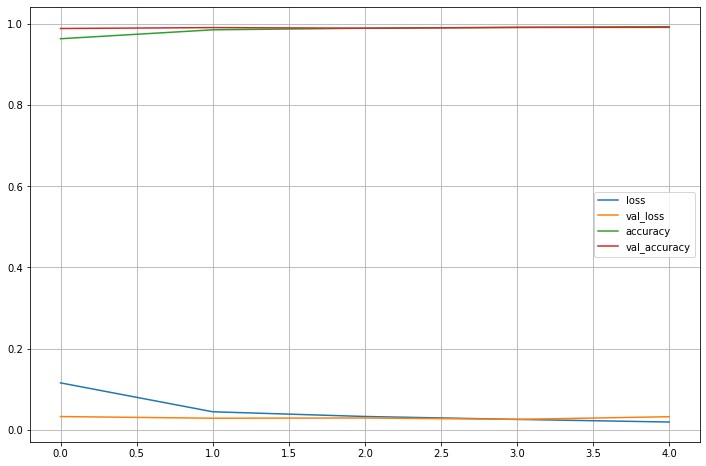

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))
for each in plot_target:
    plt.plot(hist.history[each], label=each)
plt.legend()
plt.grid()
plt.show()

In [5]:
score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.0322 - accuracy: 0.9917
Test loss:  0.03218066692352295
Test accuracy:  0.9916999936103821


In [6]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [7]:
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
len(wrong_result)

83

In [8]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[4248,
 2293,
 2597,
 3441,
 5268,
 9009,
 3520,
 1393,
 5937,
 1232,
 6597,
 8065,
 6651,
 4807,
 1260,
 3422]

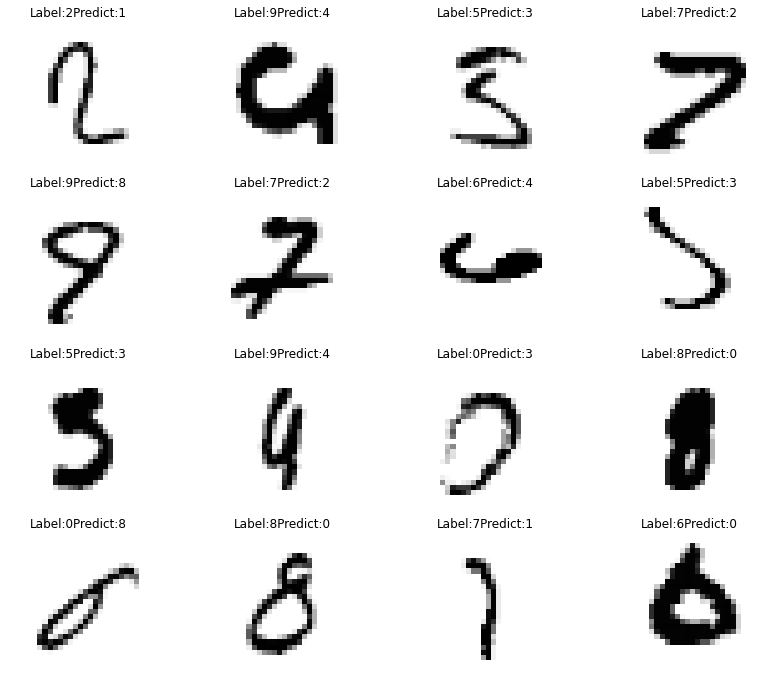

In [10]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label:' + str(y_test[n]) + 'Predict:' + str(predicted_labels[n]))
    plt.axis('off');

In [11]:
model.save('MNIST_CNN_model.h5')

In [12]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [14]:
import time

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))
print('fit time: ', time.time() - start_time)

Epoch 1/5
1875/1875 [==============================] - 99s 53ms/step - loss: 0.5952 - accuracy: 0.8040 - val_loss: 0.2866 - val_accuracy: 0.8975
Epoch 2/5
1875/1875 [==============================] - 95s 51ms/step - loss: 0.2536 - accuracy: 0.9048 - val_loss: 0.2896 - val_accuracy: 0.8876
Epoch 3/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.2123 - accuracy: 0.9205 - val_loss: 0.2567 - val_accuracy: 0.9052
Epoch 4/5
1875/1875 [==============================] - 91s 48ms/step - loss: 0.1790 - accuracy: 0.9323 - val_loss: 0.2447 - val_accuracy: 0.9139
Epoch 5/5
1875/1875 [==============================] - 99s 53ms/step - loss: 0.1552 - accuracy: 0.9409 - val_loss: 0.2546 - val_accuracy: 0.9119
fit time:  473.87499475479126


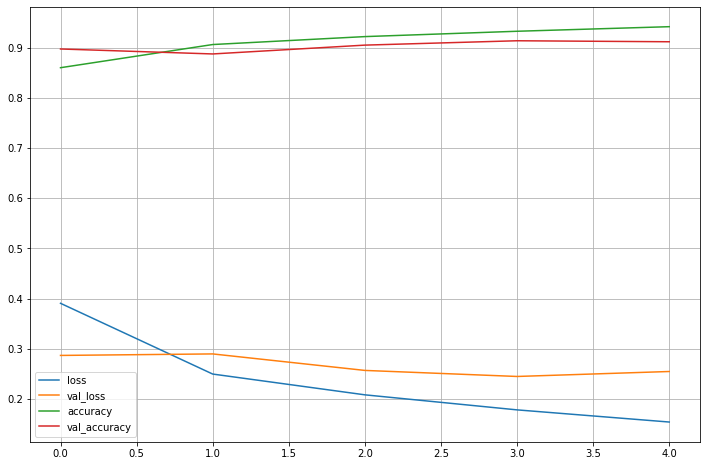

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))
for each in plot_target:
    plt.plot(hist.history[each], label=each)
plt.legend()
plt.grid()
plt.show()

In [16]:
score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.2546 - accuracy: 0.9119
Test loss:  0.25456318259239197
Test accuracy:  0.911899983882904
